<font color="#CA3532"><h1 align="left">Máster en Big Data y Data Science - Fundamentos de Análisis de Datos</h1></font>
<font color="#6E6E6E"><h2 align="left">Selección de Variables</h2></font>

<h2 align="left">1. Métodos de filtrado ("filtering")</h2></font> 

En el anterior notebook hemos trabajado con métodos para medir el grado de dependencia entre un atributo ("característica", "feature") con el target ("clase" en el caso de que la tarea de predicción sea clasificar).
En esta sección comprenderemos el funcionamiento de los métodos de filtrado univariable para la selección de características, así como sus limitaciones.

Empezaremos usando una base de datos muy conocida en Machine Learning, propuesta por R.A. Fisher en 1936. El objetivo es clasificar ejemplos de plantas *iris* en tres subespecies: iris-virginica, iris-setosa e iris-versicolor. Los atributos que describen cada ejemplo son los tamaños (longitud y anchura) del pétalo y del sépalo. Las base de datos contiene 150 ejemplos (cada una de las tres clases está representada por exactamente 50 ejemplos):

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
iris = load_iris()

print(iris.feature_names)
print(iris.data[0:10])
print(iris.target_names)
print(iris.target)

%matplotlib inline

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]
['setosa' 'versicolor' 'virginica']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


A continuación visualizaremos los datos. Como podemos observar el problema no es muy difícil. Una de las clases (setosa) está completamente separada de las otras dos, que están ligeramente solapadas entre sí.

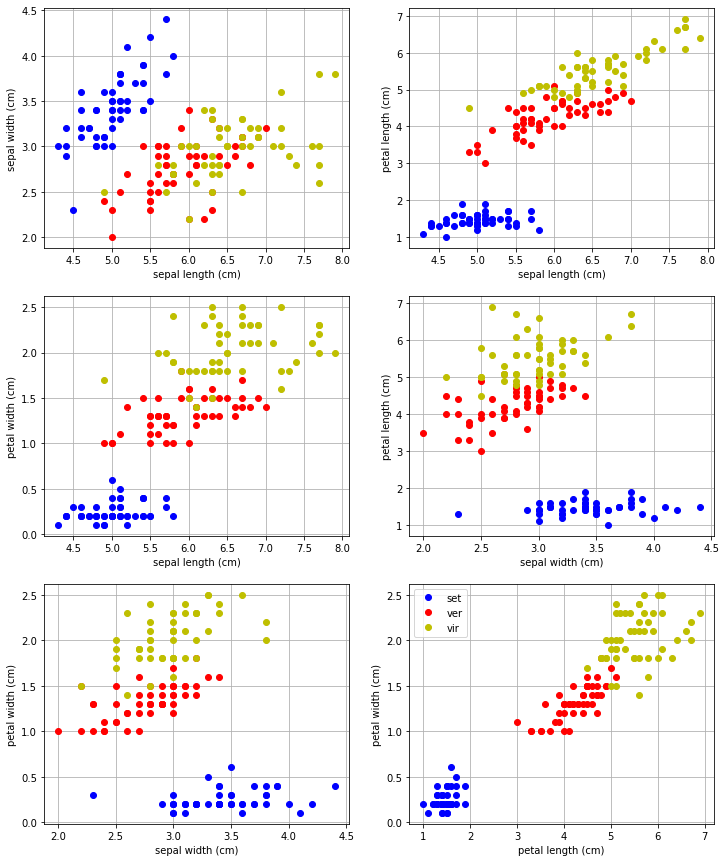

In [2]:
plt.figure(figsize=(12,15))
n_classes = 3
plot_colors = "bry"

for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3], [1, 2], [1, 3], [2, 3]]):
    X = iris.data[:, pair]
    y = iris.target

    plt.subplot(3, 2, pairidx + 1)
    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])
    plt.grid(True)
        
    plt.plot(X[y==0,0], X[y==0,1], 'bo', label=iris.target_names[0][0:3])
    plt.plot(X[y==1,0], X[y==1,1], 'ro', label=iris.target_names[1][0:3])
    plt.plot(X[y==2,0], X[y==2,1], 'yo', label=iris.target_names[2][0:3])

plt.legend(loc=2)
plt.show()

In [3]:
nruidos = 10
np.random.seed(12345)
noise = np.random.uniform(0, 1., size=(len(iris.data), nruidos))
X = np.hstack((iris.data, noise))
y = iris.target
nombres_atributos = iris.feature_names.copy()
for i in np.arange(1,nruidos+1):
    nombres_atributos.append("noise_%d" % i)

#print nombres_atributos

# training /test split
from sklearn.model_selection import train_test_split
testsize = 0.2 # in the [0,1] range. 1: 100%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=testsize, random_state=5)


In [4]:
print(iris.feature_names)
print(nombres_atributos)
print(X_train[0,:])

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)', 'noise_1', 'noise_2', 'noise_3', 'noise_4', 'noise_5', 'noise_6', 'noise_7', 'noise_8', 'noise_9', 'noise_10']
[5.1        3.4        1.5        0.2        0.55410655 0.58171022
 0.93614558 0.43434776 0.48912719 0.66613047 0.630154   0.13020475
 0.35384397 0.63512338]


In [5]:
from libreria_seleccion_variables import ranking_variables_clasificacion

In [6]:
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


petal width (cm) 	 score=0.927520 	
petal length (cm) 	 score=0.899922 	
sepal length (cm) 	 score=0.595758 	
sepal width (cm) 	 score=0.184945 	
noise_6 	 score=0.025813 	
noise_1 	 score=0.020535 	
noise_8 	 score=0.016567 	
noise_2 	 score=0.015266 	
noise_9 	 score=0.011168 	
noise_5 	 score=0.003070 	
noise_10 	 score=0.002636 	
noise_7 	 score=0.002108 	
noise_4 	 score=0.000391 	
noise_3 	 score=0.000000 	


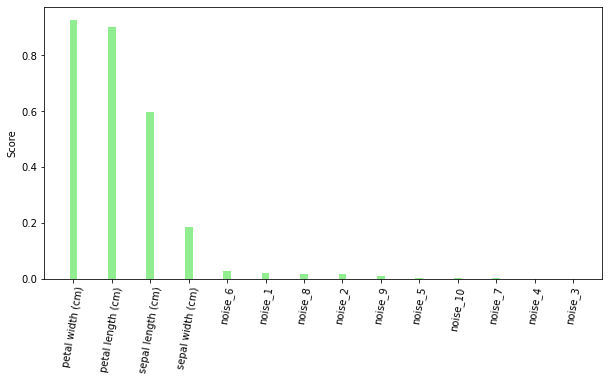

array([ 3,  2,  0,  1,  9,  4, 11,  5, 12,  8, 13, 10,  7,  6],
      dtype=int64)

In [7]:
#ranking_variables_clasificacion(X_train,y_train,nombres_atributos,
#                                "mutual_info",draw=True)
#ranking_variables_clasificacion(X_train,y_train,nombres_atributos,
#                                "f_classif")
ranking_variables_clasificacion(X_train,y_train,nombres_atributos,
                                "corr",draw=True)

petal width (cm) 	 score=1.087407 	
petal length (cm) 	 score=0.992665 	
sepal length (cm) 	 score=0.460413 	
sepal width (cm) 	 score=0.319966 	
noise_2 	 score=0.137470 	
noise_6 	 score=0.085846 	
noise_4 	 score=0.056460 	
noise_1 	 score=0.041558 	
noise_7 	 score=0.027809 	
noise_10 	 score=0.000000 	
noise_9 	 score=0.000000 	
noise_8 	 score=0.000000 	
noise_5 	 score=0.000000 	
noise_3 	 score=0.000000 	


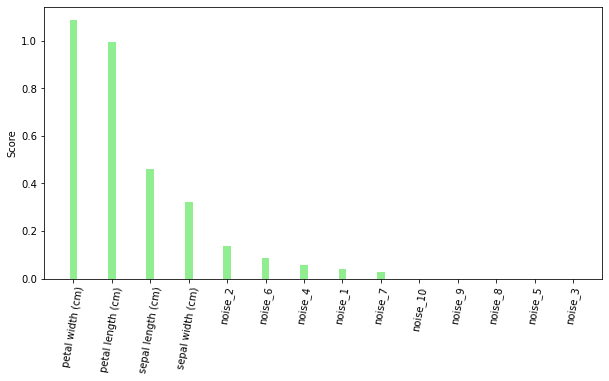

array([ 3,  2,  0,  1,  5,  9,  7,  4, 10, 13, 12, 11,  8,  6],
      dtype=int64)

In [8]:
from libreria_seleccion_variables import ranking_variables_regresion
ranking_variables_regresion(X_train,y_train.astype(float),nombres_atributos,
                            "mutual_info",draw=True)
#ranking_variables_regresion(X_train,y_train,nombres_atributos,
#                            "corr",draw=True)

### Problemas con la correlación cuando hay más de dos clases

[0 1 1 0 1 0 0 2 0 2 2 1 0 0 1 2 1 2 2 0 2 0 0 0 0 1 1 1 1 2 1 2 2 1 0 1 0
 1 2 1 2 1 2 1 1 1 2 1 0 2 0 0 1 0 0 2 1 0 2 0 2 1 0 0 2 1 1 0 0 2 1 1 0 1
 2 1 0 1 2 2 2 2 0 0 1 2 0 1 0 0 2 1 2 0 2 0 2 0 1 0 2 2 0 2 2 2 1 0 1 0 0
 1 2 0 2 0 1 2 2 1]
[1 0 0 1 0 1 1 2 1 2 2 0 1 1 0 2 0 2 2 1 2 1 1 1 1 0 0 0 0 2 0 2 2 0 1 0 1
 0 2 0 2 0 2 0 0 0 2 0 1 2 1 1 0 1 1 2 0 1 2 1 2 0 1 1 2 0 0 1 1 2 0 0 1 0
 2 0 1 0 2 2 2 2 1 1 0 2 1 0 1 1 2 0 2 1 2 1 2 1 0 1 2 2 1 2 2 2 0 1 0 1 1
 0 2 1 2 1 0 2 2 0]
petal width (cm) 	 score=0.927520 	
petal length (cm) 	 score=0.899922 	
sepal length (cm) 	 score=0.595758 	
sepal width (cm) 	 score=0.184945 	
noise_6 	 score=0.025813 	
noise_1 	 score=0.020535 	
noise_8 	 score=0.016567 	
noise_2 	 score=0.015266 	
noise_9 	 score=0.011168 	
noise_5 	 score=0.003070 	
noise_10 	 score=0.002636 	
noise_7 	 score=0.002108 	
noise_4 	 score=0.000391 	
noise_3 	 score=0.000000 	


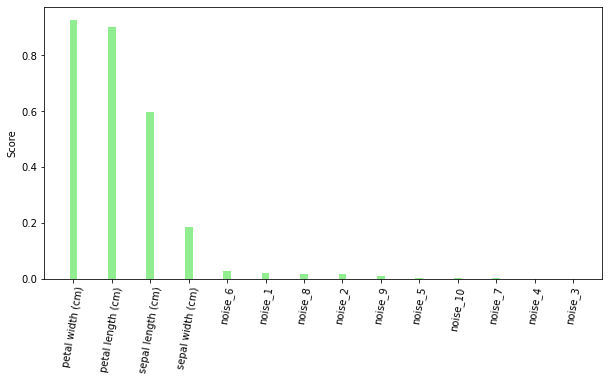



petal width (cm) 	 score=0.143706 	
sepal length (cm) 	 score=0.086970 	
petal length (cm) 	 score=0.085179 	
sepal width (cm) 	 score=0.044187 	
noise_2 	 score=0.038605 	
noise_7 	 score=0.037071 	
noise_4 	 score=0.015921 	
noise_9 	 score=0.010849 	
noise_6 	 score=0.005736 	
noise_3 	 score=0.005187 	
noise_5 	 score=0.003143 	
noise_1 	 score=0.002687 	
noise_8 	 score=0.001694 	
noise_10 	 score=0.000022 	


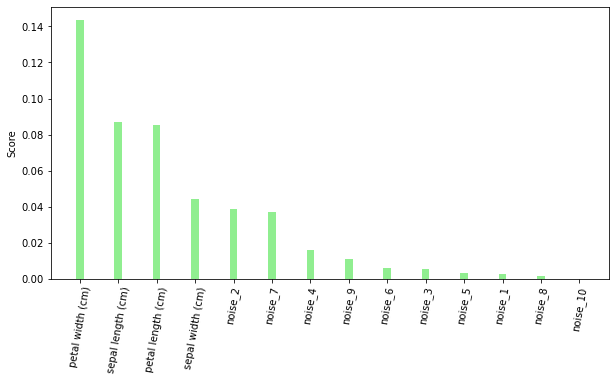

array([ 3,  0,  2,  1,  5, 10,  7, 12,  9,  6,  8,  4, 11, 13],
      dtype=int64)

In [9]:
y_train2 = y_train.copy()
y_train2[y_train==0] = 1
y_train2[y_train==1] = 0
y_train2[y_train==2] = 2

print(y_train)
print(y_train2)

ranking_variables_clasificacion(X_train,y_train,nombres_atributos,"corr",draw=True)
print("\n")
ranking_variables_clasificacion(X_train,y_train2,nombres_atributos,"corr",draw=True)

In [10]:
y_train2

array([1, 0, 0, 1, 0, 1, 1, 2, 1, 2, 2, 0, 1, 1, 0, 2, 0, 2, 2, 1, 2, 1,
       1, 1, 1, 0, 0, 0, 0, 2, 0, 2, 2, 0, 1, 0, 1, 0, 2, 0, 2, 0, 2, 0,
       0, 0, 2, 0, 1, 2, 1, 1, 0, 1, 1, 2, 0, 1, 2, 1, 2, 0, 1, 1, 2, 0,
       0, 1, 1, 2, 0, 0, 1, 0, 2, 0, 1, 0, 2, 2, 2, 2, 1, 1, 0, 2, 1, 0,
       1, 1, 2, 0, 2, 1, 2, 1, 2, 1, 0, 1, 2, 2, 1, 2, 2, 2, 0, 1, 0, 1,
       1, 0, 2, 1, 2, 1, 0, 2, 2, 0])

### ¿Este problema lo tiene también la información mutua?

In [11]:
print("Ranking usando y_train:\n")
ranking_variables_clasificacion(X_train,y_train,nombres_atributos,"mutual_info")
print("\nRanking usando una recodificación de y_train (y_train2):\n")
ranking_variables_clasificacion(X_train,y_train2,nombres_atributos,"mutual_info")

# lo tiene f_classif ?

Ranking usando y_train:

petal width (cm) 	 score=1.038506 	
petal length (cm) 	 score=0.984441 	
sepal length (cm) 	 score=0.458713 	
sepal width (cm) 	 score=0.306177 	
noise_2 	 score=0.137470 	
noise_6 	 score=0.085846 	
noise_4 	 score=0.056460 	
noise_1 	 score=0.041558 	
noise_7 	 score=0.027809 	
noise_10 	 score=0.000000 	
noise_9 	 score=0.000000 	
noise_8 	 score=0.000000 	
noise_5 	 score=0.000000 	
noise_3 	 score=0.000000 	

Ranking usando una recodificación de y_train (y_train2):

petal width (cm) 	 score=1.038506 	
petal length (cm) 	 score=0.984441 	
sepal length (cm) 	 score=0.458713 	
sepal width (cm) 	 score=0.306177 	
noise_2 	 score=0.137470 	
noise_6 	 score=0.085846 	
noise_4 	 score=0.056460 	
noise_1 	 score=0.041558 	
noise_7 	 score=0.027809 	
noise_10 	 score=0.000000 	
noise_9 	 score=0.000000 	
noise_8 	 score=0.000000 	
noise_5 	 score=0.000000 	
noise_3 	 score=0.000000 	


array([ 3,  2,  0,  1,  5,  9,  7,  4, 10, 13, 12, 11,  8,  6],
      dtype=int64)

In [12]:
# Atributos que son copias
# Añado un atributo que es una copia del cuarto,
# y otro que es la suma del tercero y el cuarto

X_train2 = np.array(np.hstack((X_train,
                               np.matrix(X_train[:,3]).T, 
                               np.matrix(X_train[:,2]+X_train[:,3]).T)))
nombres_atributos2 = nombres_atributos.copy()
nombres_atributos2.append(nombres_atributos[3]+"_copy")
nombres_atributos2.append(nombres_atributos[2]+"+"+nombres_atributos[3])

print(nombres_atributos2)

ranking_variables_clasificacion(X_train,y_train,nombres_atributos,"mutual_info")
print("\n")
ranking_variables_clasificacion(X_train2,y_train,nombres_atributos2,"mutual_info")


['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)', 'noise_1', 'noise_2', 'noise_3', 'noise_4', 'noise_5', 'noise_6', 'noise_7', 'noise_8', 'noise_9', 'noise_10', 'petal width (cm)_copy', 'petal length (cm)+petal width (cm)']
petal width (cm) 	 score=1.038506 	
petal length (cm) 	 score=0.984441 	
sepal length (cm) 	 score=0.458713 	
sepal width (cm) 	 score=0.306177 	
noise_2 	 score=0.137470 	
noise_6 	 score=0.085846 	
noise_4 	 score=0.056460 	
noise_1 	 score=0.041558 	
noise_7 	 score=0.027809 	
noise_10 	 score=0.000000 	
noise_9 	 score=0.000000 	
noise_8 	 score=0.000000 	
noise_5 	 score=0.000000 	
noise_3 	 score=0.000000 	


petal width (cm)_copy 	 score=1.038506 	
petal width (cm) 	 score=1.038506 	
petal length (cm)+petal width (cm) 	 score=1.034225 	
petal length (cm) 	 score=0.984441 	
sepal length (cm) 	 score=0.458713 	
sepal width (cm) 	 score=0.306177 	
noise_2 	 score=0.137470 	
noise_6 	 score=0.085846 	
noise_4 	 score=0.056460 	
no

array([14,  3, 15,  2,  0,  1,  5,  9,  7,  4, 10, 13, 12, 11,  8,  6],
      dtype=int64)

### Atributos que no son informativos por separado pero sí en conjunto

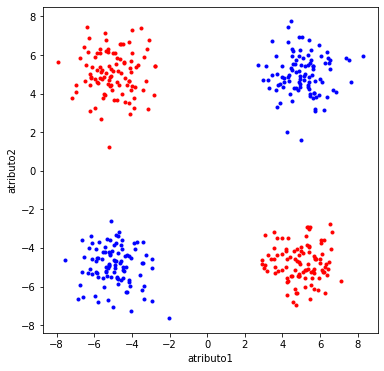

In [13]:
n=100
delta = 5
aux1=np.random.randn(n,2)
aux1=aux1 + delta
aux2=np.random.randn(n,2)
aux2=aux2 - delta
aux3=np.random.randn(n,2)
aux3[:,0]=aux3[:,0] - delta
aux3[:,1]=aux3[:,1] + delta
aux4=np.random.randn(n,2)
aux4[:,0]=aux4[:,0] + delta
aux4[:,1]=aux4[:,1] - delta
X = np.vstack((aux1,aux2,aux3,aux4))
y = np.zeros(4*n)
y[2*n:] = 1
y = np.array(y)
nombres_atributos = ["atributo1", "atributo2"]

plt.figure(figsize=(6,6))
plt.plot(X[y==0,0], X[y==0,1], 'b.')
plt.plot(X[y==1,0], X[y==1,1], 'r.')
plt.xlabel(nombres_atributos[0])
plt.ylabel(nombres_atributos[1])
plt.show()

In [14]:
nruidos = 10
noise = np.random.randn(len(X), nruidos)
X_ext = np.hstack((X.copy(), noise))
nombres_atributos_ext = nombres_atributos.copy()
for i in range(1,nruidos+1):
    nombres_atributos_ext.append("noise_%d" % i)

print(nombres_atributos_ext)
print(np.shape(X_ext))
print(X_ext[0,:])

['atributo1', 'atributo2', 'noise_1', 'noise_2', 'noise_3', 'noise_4', 'noise_5', 'noise_6', 'noise_7', 'noise_8', 'noise_9', 'noise_10']
(400, 12)
[ 6.37124455  6.1620206  -0.29333288 -0.2424589  -3.05698974  1.91840302
 -0.57882769  1.84744626  0.45373927 -0.30245024  1.40255769  1.21235438]


noise_10 	 score=0.023768 	
noise_2 	 score=0.014042 	
noise_3 	 score=0.011318 	
noise_9 	 score=0.009629 	
noise_4 	 score=0.009126 	
noise_7 	 score=0.000446 	
noise_8 	 score=0.000000 	
noise_6 	 score=0.000000 	
noise_5 	 score=0.000000 	
noise_1 	 score=0.000000 	
atributo2 	 score=0.000000 	
atributo1 	 score=0.000000 	


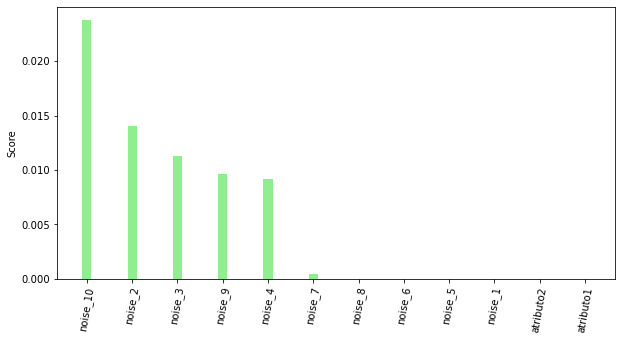

noise_8 	 score=0.024129 	
noise_4 	 score=0.016113 	
noise_2 	 score=0.010279 	
noise_5 	 score=0.006385 	
noise_7 	 score=0.005074 	
noise_10 	 score=0.001172 	
atributo2 	 score=0.000414 	
noise_9 	 score=0.000153 	
noise_1 	 score=0.000145 	
noise_6 	 score=0.000144 	
noise_3 	 score=0.000064 	
atributo1 	 score=0.000002 	


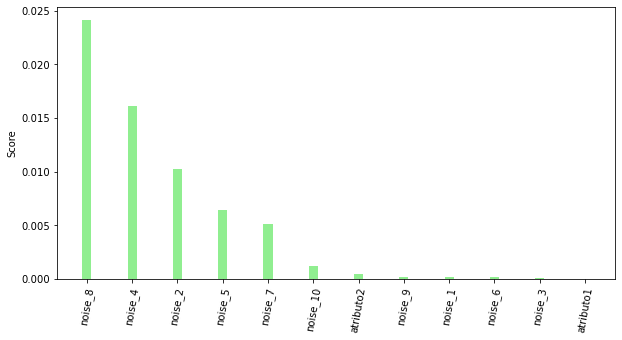

array([ 9,  5,  3,  6,  8, 11,  1, 10,  2,  7,  4,  0], dtype=int64)

In [15]:
testsize = 0.2 # in the [0,1] range. 1: 100%
X_train, X_test, y_train, y_test = train_test_split(X_ext, y, test_size=testsize, random_state=1)

ranking_variables_clasificacion(X_train,y_train,nombres_atributos_ext,
                                "mutual_info",draw=True)
ranking_variables_clasificacion(X_train,y_train,nombres_atributos_ext,
                                "corr",draw=True)

# 2. Métodos "wrapping"

En esta sección vamos a ver algunas (de las muchas) estrategias de wrapping existentes.

### Estrategia 1: Recursive Feature Elimination (RFE)

Se obtiene de manera recursiva el conjunto de atributos más informativo. Se parte de todos los atributos, se elimina el que menos afecte al score del modelo, y se vuelve a repetir el proceso hasta que se encuentra el número elegido.

**RFE(estimator, n_features_to_select=3, step=1, verbose=True)**

* **estimator:** estimador de un modelo supervisado. Dicho modelo debe tener un método "fit" (todos los modelos en sklearn lo tienen) y un campo con información sobre la importancia de cada atributo. Dicho campo tiene que llamarse "coef_" o "feature_importances_". Ejemplos válidos: RandomForest, LogisticRegression, LinearRegression


* **n_features_to_select:** número de atributos a seleccionar. Si no se pone nada se seleccionan la mitad de los atributos. Por defecto es 3


* **step:** número de atributos a eliminar en cada iteración. Si está en el intervalo (0.0, 1.0) indica el porcentaje (redondeado a la baja) de atributos a elimianr en cada iteración. Por defecto es 1

* **verbose:** por defecto es 1


Para más información ejecutar:

**?RFE**

In [16]:
from sklearn.feature_selection import RFE

# ?RFE

In [17]:
from sklearn.svm import SVC
from sklearn import linear_model
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier as kNN

#wrapper_model = LogisticRegression()
#wrapper_model = SVC(kernel="linear", C=1)
wrapper_model = RandomForestClassifier(n_estimators=101)
#wrapper_model = kNN()

rfe = RFE(estimator=wrapper_model, n_features_to_select=3,
          step=1, verbose=True)
rfe.fit(X_train, y_train)

inds_elegidos = np.where(rfe.support_)[0]
print("\nElegidos:")
print(np.array(nombres_atributos_ext)[inds_elegidos])

Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.

Elegidos:
['atributo1' 'atributo2' 'noise_8']


In [18]:
X_train_red = X_train[:,inds_elegidos]
X_test_red = X_test[:,inds_elegidos]

my_model = kNN()
#my_model = LogisticRegression()
my_model.fit(X_train_red,y_train)
print('Score de my_model en train: %.3f' % my_model.score(X_train_red, y_train))
print('Score de my_model en test : %.3f' % my_model.score(X_test_red, y_test))

Score de my_model en train: 1.000
Score de my_model en test : 1.000


### Estrategia 2:  Recursive Feature Elimination con validación cruzada (RFECV)

Otra estrategia es añadir a RFE validación cruzada para obterner automáticamente el número de atributos.


**RFECV(estimator, step=1, min_features_to_select=1, cv='warn', scoring=None, verbose=0, n_jobs=None)**

* **estimator:** estimador de un modelo supervisado. Dicho modelo debe tener un método "fit" (todos los modelos en sklearn lo tienen) y un campo con información sobre la importancia de cada atributo. Dicho campo tiene que llamarse "coef_" o "feature_importances_". Ejemplos válidos: RandomForest, LogisticRegression, LinearRegression


* **step:** número de atributos a eliminar en cada iteración. Si está en el intervalo (0.0, 1.0) indica el porcentaje (redondeado a la baja) de atributos a elimianr en cada iteración. Por defecto es 1


* **min_features_to_select:** número mínimo de atributos a seleccionar. Si no se pone nada se seleccionan la mitad de los atributos. Por defecto es 3


* **cv:** generador / iterador de validación cruzada. Determina la estrategia de partición de cross validation. Si no se especifica, se usa 3-fold cross validation


* **scoring**: función de score. Por defecto: ninguna


* **verbose:** por defecto es 0


* **n_jobs:** número de cores que se pueden ejecutar en paralelo. Por defecto: 1. El valor -1 indica "todos los procesadores"


Para más información ejecutar:

**?RFECV**

In [19]:
from sklearn.feature_selection import RFECV

# ?RFECV

In [26]:
y_train.shape

(320,)

In [20]:
#wrapper_model = LogisticRegression()
#wrapper_model = SVC(kernel="linear", C=1)
wrapper_model = RandomForestClassifier(n_estimators=101)

rfecv = RFECV(estimator=wrapper_model, step=1, cv=5, verbose=1,
              scoring='accuracy') # scoring: proporcional al número de aciertos
rfecv.fit(X_train, y_train)

inds_elegidos = np.where(rfecv.support_)[0]
print("\nElegidos:")
print(np.array(nombres_atributos_ext)[inds_elegidos])

X_train_red = X_train[:,inds_elegidos]
X_test_red = X_test[:,inds_elegidos]

my_model = kNN()
#my_model = LogisticRegression()
my_model.fit(X_train_red,y_train)
print('Score de my_model en train: %.3f' % my_model.score(X_train_red, y_train))
print('Score de my_model en test : %.3f' % my_model.score(X_test_red, y_test))

Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.
Fitting estimator with 3 features.
Fitting estimator with 2 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.
Fitting estimator with 3 features.
Fitting estimator with 2 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting est

### Estrategia 3: entrenar un modelo auxiliar que esté diseñado también para dar la importancia de los atributos, y seleccionar usando esta información los atributos que usaremos en nuestro modelo.

In [21]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
aux1 = ExtraTreesClassifier(n_estimators = 21)
aux1.fit(X_train, y_train)

print(aux1.feature_importances_)

aux2 = SelectFromModel(aux1, prefit=True)
inds_elegidos = np.where(aux2.get_support())[0]
print("\nElegidos:")
print(np.array(nombres_atributos_ext)[inds_elegidos])

X_train_red = X_train[:,inds_elegidos]
X_test_red = X_test[:,inds_elegidos]

my_model = kNN()
#my_model = LogisticRegression()
my_model.fit(X_train_red,y_train)
print('Score de my_model en train: %.3f' % my_model.score(X_train_red, y_train))
print('Score de my_model en test : %.3f' % my_model.score(X_test_red, y_test))

[0.16406533 0.20534508 0.04726708 0.0653805  0.06823678 0.06865308
 0.06105984 0.05769797 0.06424189 0.05956684 0.07757556 0.06091004]

Elegidos:
['atributo1' 'atributo2']
Score de my_model en train: 1.000
Score de my_model en test : 1.000


### Estrategia 4: Implementación propia de RFECV

In [22]:
from libreria_seleccion_variables import mi_RFECV
from sklearn.tree import DecisionTreeClassifier as tree

#wrapper_model = LogisticRegression()
wrapper_model = tree()
#wrapper_model = RandomForestClassifier(n_estimators=21)

elegidos = mi_RFECV(X_train, y_train, wrapper_model, nfolds=5, verbose=True)

Modelo con 12 atributos. Score: 0.58125
Modelo con 11 atributos. Score: 0.671875
Modelo con 10 atributos. Score: 0.71875
Modelo con 9 atributos. Score: 0.753125
Modelo con 8 atributos. Score: 0.7625
Modelo con 7 atributos. Score: 0.79375
Modelo con 6 atributos. Score: 0.81875
Modelo con 5 atributos. Score: 0.871875
Modelo con 4 atributos. Score: 0.94375
Modelo con 3 atributos. Score: 0.9625
Modelo con 2 atributos. Score: 0.990625
Modelo con 1 atributo. Score: 0.503125


In [23]:
print(elegidos)

[0, 1]


In [24]:
np.array(nombres_atributos_ext)[elegidos]

array(['atributo1', 'atributo2'], dtype='<U9')